In [1]:
#Instructions
#Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv(r'C:\Users\Anderson\Desktop\learningSet.csv\learningSet.csv')
df

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [4]:
categorical_columns = df.select_dtypes(include=['object'])


print(categorical_columns.columns)

Index(['OSOURCE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE',
       'RECP3', 'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN', 'CLUSTER',
       'AGEFLAG', 'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18',
       'GENDER', 'DATASRCE', 'SOLP3', 'SOLIH', 'MAJOR', 'GEOCODE', 'COLLECT1',
       'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO',
       'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER',
       'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_2', 'RFA_3',
       'RFA_4', 'RFA_5', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10',
       'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_15', 'RFA_16', 'RFA_17',
       'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24',
       'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')


In [16]:
null_df = categorical_columns.isnull().sum() / len(categorical_columns)
threshold = 0.85
columns_above_threshold = null_df[null_df > threshold]
print(columns_above_threshold)

Series([], dtype: float64)


In [6]:
#Check for null values in the numerical columns.
nulls = df.isnull().sum()
nulls

ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
CLUSTER2    132
GEOCODE2    132
Length: 481, dtype: int64

In [7]:
#Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [9]:
columns_to_check = ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']

# Iterate through the specified columns and print the unique values
for column in columns_to_check:
    print(f"Column: {column}")
    print(df[column].unique())
    print("-" * 40)

Column: GEOCODE2
['C', 'A', 'D', 'B', ' ', 'Unknown']
Categories (6, object): [' ', 'A', 'B', 'C', 'D', 'Unknown']
----------------------------------------
Column: WEALTH1
[nan  9.  1.  4.  2.  6.  0.  5.  8.  3.  7.]
----------------------------------------
Column: ADI
[177.  13. 281.  67. 127. 185.  91. 251. 391. 181. 269.  83. 107. 249.
 291.  57. 227. 329. 351.  55. 133.  51.  73. 159. 201.  75. 233. 591.
 203. 175.  59. 105. 111. 173. 415. 323. 187.  65. 412. 109. 425. 405.
 197. 279. 645. 207.  89. 361. 209. 213.  15.  21. 113. 131. 469. 199.
 129. 441. 459. 235. 301.  39. 429. 285. 245. 335. 393. 577. 439. 455.
 383. 263.   0. 427. 307. 275. 119. 229. 273. 325. 371. 377. 315. 342.
 421. 219.  61.  93. 375. 283. 381. 243. 353. 613. 339. 367. 417. 299.
 271. 157.  77. 327.  53.  87. 451. 627.  71. 253. 363. 403. 115. 389.
  63. 321. 448. 237. 217. 241. 123. 221. 165. 277.  85. 319. 247.  69.
 379.  95.  17. 625. 462. 303. 179. 331. 231. 337. 257. 409. 457. 359.
 373.  nan 413. 215

In [10]:
df['GEOCODE2'].fillna('Unknown', inplace=True)
df['GEOCODE2'] = df['GEOCODE2'].astype('category')

In [11]:
df['WEALTH1'].fillna(df['WEALTH1'].mode()[0], inplace=True)
df['WEALTH1'] = df['WEALTH1'].astype('category')

In [12]:
df['ADI'].fillna(df['ADI'].median(), inplace=True)

In [13]:
df['DMA'].fillna(df['DMA'].median(), inplace=True)

In [14]:
df['MSA'].fillna(df['MSA'].median(), inplace=True)

In [15]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: category(2), float64(96), int64(310), object(73)
memory usage: 348.9+ MB
None
             ODATEDW OSOURCE         TCODE  STATE    ZIP MAILCODE PVASTATE  \
count   95412.000000   95412  95412.000000  95412  95412    95412    95412   
unique           NaN     896           NaN     57  19938        2        3   
top              NaN     MBC           NaN     CA  85351                     
freq             NaN    4539           NaN  17343     61    94013    93954   
mean     9141.363256     NaN     54.223117    NaN    NaN      NaN      NaN   
std       343.454752     NaN    953.844476    NaN    NaN      NaN      NaN   
min      8306.000000     NaN      0.000000    NaN    NaN      NaN      NaN   
25%      8801.000000     NaN      0.000000    NaN    NaN      NaN      NaN   
50%      9201.000000     NaN      1.000000    NaN    NaN      NaN      NaN   
75%      9501.00

In [17]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

AGE         23665
NUMCHLD     83026
INCOME      21286
MBCRAFT     52854
MBGARDEN    52854
            ...  
RAMNT_23    87553
RAMNT_24    77674
NEXTDATE     9973
TIMELAG      9973
CLUSTER2      132
Length: 87, dtype: int64


In [18]:
df

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


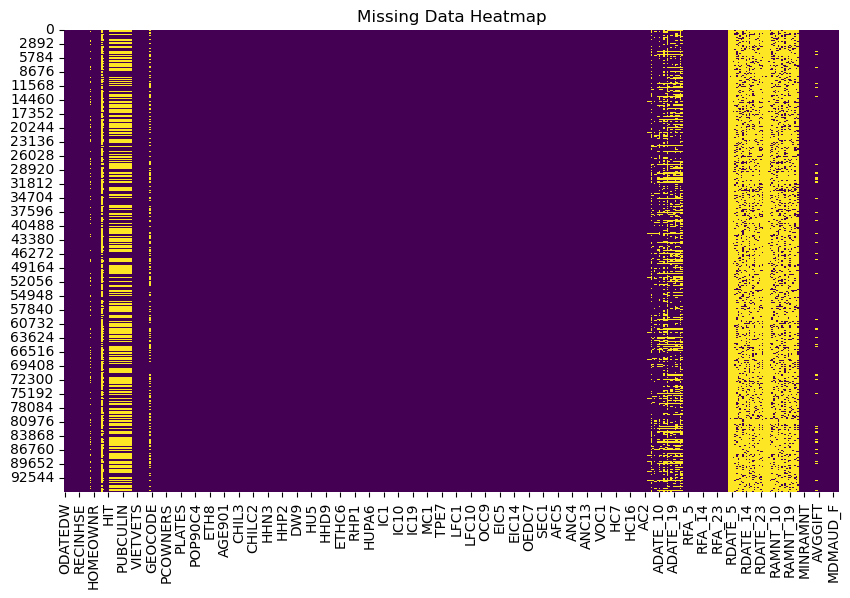

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns

df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(10, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned = df.dropna()

In [ ]:
print(df_cleaned.isnull().sum())